## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 49s
1:	learn: 0.9301086	total: 51.2ms	remaining: 25.6s
2:	learn: 0.9005637	total: 53.2ms	remaining: 17.7s
3:	learn: 0.8720983	total: 57ms	remaining: 14.2s
4:	learn: 0.8467410	total: 59.1ms	remaining: 11.8s
5:	learn: 0.8226672	total: 61ms	remaining: 10.1s
6:	learn: 0.7994702	total: 62.9ms	remaining: 8.92s
7:	learn: 0.7784272	total: 64.9ms	remaining: 8.04s
8:	learn: 0.7602192	total: 66.8ms	remaining: 7.36s
9:	learn: 0.7412421	total: 69.1ms	remaining: 6.84s
10:	learn: 0.7247930	total: 71.2ms	remaining: 6.4s
11:	learn: 0.7089951	total: 73.2ms	remaining: 6.03s
12:	learn: 0.6951345	total: 75.2ms	remaining: 5.71s
13:	learn: 0.6809276	total: 77.2ms	remaining: 5.44s
14:	learn: 0.6692630	total: 79.2ms	remaining: 5.2s
15:	learn: 0.6588323	total: 81.1ms	remaining: 4.99s
16:	learn: 0.6472700	total: 83ms	remaining: 4.8s
17:	learn: 0.6379982	total: 85ms	remaining: 4.64s
18:	learn: 0.6294674	total: 86.9ms	remaining: 4.49s
19:	learn: 0.6193295	total: 88.9ms	re

56:	learn: 0.4861566	total: 166ms	remaining: 2.74s
57:	learn: 0.4850201	total: 168ms	remaining: 2.73s
58:	learn: 0.4840055	total: 170ms	remaining: 2.71s
59:	learn: 0.4824455	total: 172ms	remaining: 2.7s
60:	learn: 0.4809744	total: 174ms	remaining: 2.68s
61:	learn: 0.4801376	total: 176ms	remaining: 2.67s
62:	learn: 0.4792422	total: 178ms	remaining: 2.65s
63:	learn: 0.4780719	total: 180ms	remaining: 2.64s
64:	learn: 0.4771984	total: 182ms	remaining: 2.62s
65:	learn: 0.4759610	total: 184ms	remaining: 2.61s
66:	learn: 0.4750287	total: 186ms	remaining: 2.59s
67:	learn: 0.4740093	total: 188ms	remaining: 2.58s
68:	learn: 0.4732612	total: 190ms	remaining: 2.56s
69:	learn: 0.4727266	total: 192ms	remaining: 2.55s
70:	learn: 0.4716549	total: 194ms	remaining: 2.54s
71:	learn: 0.4709088	total: 196ms	remaining: 2.53s
72:	learn: 0.4697594	total: 198ms	remaining: 2.52s
73:	learn: 0.4690934	total: 200ms	remaining: 2.5s
74:	learn: 0.4680942	total: 202ms	remaining: 2.49s
75:	learn: 0.4672726	total: 204ms

80:	learn: 0.4628457	total: 215ms	remaining: 2.43s
81:	learn: 0.4620203	total: 217ms	remaining: 2.43s
82:	learn: 0.4608838	total: 219ms	remaining: 2.42s
83:	learn: 0.4604376	total: 221ms	remaining: 2.41s
84:	learn: 0.4596603	total: 223ms	remaining: 2.4s
85:	learn: 0.4587835	total: 225ms	remaining: 2.39s
86:	learn: 0.4583577	total: 227ms	remaining: 2.38s
87:	learn: 0.4577999	total: 229ms	remaining: 2.37s
88:	learn: 0.4572657	total: 231ms	remaining: 2.36s
89:	learn: 0.4569360	total: 233ms	remaining: 2.35s
90:	learn: 0.4559969	total: 235ms	remaining: 2.35s
91:	learn: 0.4549716	total: 237ms	remaining: 2.34s
92:	learn: 0.4544919	total: 239ms	remaining: 2.33s
93:	learn: 0.4537693	total: 241ms	remaining: 2.33s
94:	learn: 0.4532673	total: 243ms	remaining: 2.32s
95:	learn: 0.4526987	total: 246ms	remaining: 2.31s
96:	learn: 0.4520952	total: 248ms	remaining: 2.31s
97:	learn: 0.4513919	total: 250ms	remaining: 2.3s
98:	learn: 0.4503747	total: 252ms	remaining: 2.29s
99:	learn: 0.4494783	total: 254ms

133:	learn: 0.4323720	total: 332ms	remaining: 2.14s
134:	learn: 0.4319935	total: 334ms	remaining: 2.14s
135:	learn: 0.4313895	total: 336ms	remaining: 2.13s
136:	learn: 0.4307446	total: 338ms	remaining: 2.13s
137:	learn: 0.4304464	total: 340ms	remaining: 2.12s
138:	learn: 0.4298257	total: 342ms	remaining: 2.12s
139:	learn: 0.4295800	total: 344ms	remaining: 2.11s
140:	learn: 0.4292928	total: 346ms	remaining: 2.11s
141:	learn: 0.4288053	total: 348ms	remaining: 2.1s
142:	learn: 0.4282748	total: 350ms	remaining: 2.1s
143:	learn: 0.4277528	total: 352ms	remaining: 2.09s
144:	learn: 0.4274087	total: 354ms	remaining: 2.09s
145:	learn: 0.4271984	total: 356ms	remaining: 2.08s
146:	learn: 0.4268458	total: 358ms	remaining: 2.08s
147:	learn: 0.4264987	total: 360ms	remaining: 2.08s
148:	learn: 0.4262192	total: 363ms	remaining: 2.07s
149:	learn: 0.4257966	total: 365ms	remaining: 2.07s
150:	learn: 0.4253062	total: 367ms	remaining: 2.06s
151:	learn: 0.4247446	total: 369ms	remaining: 2.06s
152:	learn: 0.

157:	learn: 0.4218088	total: 382ms	remaining: 2.03s
158:	learn: 0.4213239	total: 384ms	remaining: 2.03s
159:	learn: 0.4210022	total: 386ms	remaining: 2.03s
160:	learn: 0.4201256	total: 388ms	remaining: 2.02s
161:	learn: 0.4197073	total: 390ms	remaining: 2.02s
162:	learn: 0.4192052	total: 392ms	remaining: 2.02s
163:	learn: 0.4187949	total: 395ms	remaining: 2.01s
164:	learn: 0.4184572	total: 397ms	remaining: 2.01s
165:	learn: 0.4180680	total: 399ms	remaining: 2s
166:	learn: 0.4176884	total: 401ms	remaining: 2s
167:	learn: 0.4173026	total: 403ms	remaining: 2s
168:	learn: 0.4170486	total: 405ms	remaining: 1.99s
169:	learn: 0.4165960	total: 408ms	remaining: 1.99s
170:	learn: 0.4161870	total: 410ms	remaining: 1.99s
171:	learn: 0.4156228	total: 412ms	remaining: 1.98s
172:	learn: 0.4153041	total: 414ms	remaining: 1.98s
173:	learn: 0.4148857	total: 417ms	remaining: 1.98s
174:	learn: 0.4144190	total: 419ms	remaining: 1.97s
175:	learn: 0.4140875	total: 421ms	remaining: 1.97s
176:	learn: 0.4136755

212:	learn: 0.4008287	total: 497ms	remaining: 1.84s
213:	learn: 0.4005210	total: 500ms	remaining: 1.83s
214:	learn: 0.4002274	total: 502ms	remaining: 1.83s
215:	learn: 0.3998919	total: 504ms	remaining: 1.83s
216:	learn: 0.3994781	total: 506ms	remaining: 1.82s
217:	learn: 0.3992639	total: 508ms	remaining: 1.82s
218:	learn: 0.3989428	total: 510ms	remaining: 1.82s
219:	learn: 0.3986243	total: 512ms	remaining: 1.81s
220:	learn: 0.3982897	total: 514ms	remaining: 1.81s
221:	learn: 0.3981001	total: 516ms	remaining: 1.81s
222:	learn: 0.3978579	total: 518ms	remaining: 1.8s
223:	learn: 0.3976462	total: 520ms	remaining: 1.8s
224:	learn: 0.3973704	total: 522ms	remaining: 1.8s
225:	learn: 0.3971729	total: 524ms	remaining: 1.79s
226:	learn: 0.3968841	total: 526ms	remaining: 1.79s
227:	learn: 0.3965787	total: 528ms	remaining: 1.79s
228:	learn: 0.3963073	total: 530ms	remaining: 1.78s
229:	learn: 0.3960925	total: 532ms	remaining: 1.78s
230:	learn: 0.3957018	total: 534ms	remaining: 1.78s
231:	learn: 0.3

236:	learn: 0.3941497	total: 546ms	remaining: 1.76s
237:	learn: 0.3939819	total: 548ms	remaining: 1.75s
238:	learn: 0.3938322	total: 550ms	remaining: 1.75s
239:	learn: 0.3935463	total: 552ms	remaining: 1.75s
240:	learn: 0.3933166	total: 554ms	remaining: 1.74s
241:	learn: 0.3930992	total: 556ms	remaining: 1.74s
242:	learn: 0.3928898	total: 558ms	remaining: 1.74s
243:	learn: 0.3926199	total: 560ms	remaining: 1.74s
244:	learn: 0.3923955	total: 562ms	remaining: 1.73s
245:	learn: 0.3922312	total: 564ms	remaining: 1.73s
246:	learn: 0.3919499	total: 566ms	remaining: 1.73s
247:	learn: 0.3917420	total: 568ms	remaining: 1.72s
248:	learn: 0.3915186	total: 570ms	remaining: 1.72s
249:	learn: 0.3912759	total: 572ms	remaining: 1.72s
250:	learn: 0.3908375	total: 574ms	remaining: 1.71s
251:	learn: 0.3904815	total: 576ms	remaining: 1.71s
252:	learn: 0.3902127	total: 578ms	remaining: 1.71s
253:	learn: 0.3900274	total: 580ms	remaining: 1.7s
254:	learn: 0.3898171	total: 582ms	remaining: 1.7s
255:	learn: 0.

293:	learn: 0.3809978	total: 662ms	remaining: 1.59s
294:	learn: 0.3807825	total: 664ms	remaining: 1.59s
295:	learn: 0.3805940	total: 666ms	remaining: 1.58s
296:	learn: 0.3801959	total: 668ms	remaining: 1.58s
297:	learn: 0.3799439	total: 670ms	remaining: 1.58s
298:	learn: 0.3797228	total: 672ms	remaining: 1.57s
299:	learn: 0.3795554	total: 674ms	remaining: 1.57s
300:	learn: 0.3793733	total: 676ms	remaining: 1.57s
301:	learn: 0.3791607	total: 678ms	remaining: 1.57s
302:	learn: 0.3789297	total: 680ms	remaining: 1.56s
303:	learn: 0.3787482	total: 682ms	remaining: 1.56s
304:	learn: 0.3786528	total: 684ms	remaining: 1.56s
305:	learn: 0.3784406	total: 686ms	remaining: 1.55s
306:	learn: 0.3782934	total: 688ms	remaining: 1.55s
307:	learn: 0.3781631	total: 690ms	remaining: 1.55s
308:	learn: 0.3779278	total: 692ms	remaining: 1.55s
309:	learn: 0.3777358	total: 694ms	remaining: 1.54s
310:	learn: 0.3775809	total: 696ms	remaining: 1.54s
311:	learn: 0.3774323	total: 698ms	remaining: 1.54s
312:	learn: 

318:	learn: 0.3761284	total: 712ms	remaining: 1.52s
319:	learn: 0.3760168	total: 714ms	remaining: 1.52s
320:	learn: 0.3757763	total: 716ms	remaining: 1.51s
321:	learn: 0.3756076	total: 718ms	remaining: 1.51s
322:	learn: 0.3754123	total: 720ms	remaining: 1.51s
323:	learn: 0.3751852	total: 722ms	remaining: 1.5s
324:	learn: 0.3750004	total: 723ms	remaining: 1.5s
325:	learn: 0.3749086	total: 725ms	remaining: 1.5s
326:	learn: 0.3746654	total: 727ms	remaining: 1.5s
327:	learn: 0.3745405	total: 729ms	remaining: 1.49s
328:	learn: 0.3743710	total: 731ms	remaining: 1.49s
329:	learn: 0.3741679	total: 733ms	remaining: 1.49s
330:	learn: 0.3738646	total: 735ms	remaining: 1.49s
331:	learn: 0.3736647	total: 737ms	remaining: 1.48s
332:	learn: 0.3733429	total: 739ms	remaining: 1.48s
333:	learn: 0.3732059	total: 741ms	remaining: 1.48s
334:	learn: 0.3730574	total: 743ms	remaining: 1.47s
335:	learn: 0.3728663	total: 745ms	remaining: 1.47s
336:	learn: 0.3727111	total: 747ms	remaining: 1.47s
337:	learn: 0.37

378:	learn: 0.3656680	total: 828ms	remaining: 1.35s
379:	learn: 0.3654606	total: 830ms	remaining: 1.35s
380:	learn: 0.3651842	total: 832ms	remaining: 1.35s
381:	learn: 0.3650538	total: 834ms	remaining: 1.35s
382:	learn: 0.3649246	total: 836ms	remaining: 1.35s
383:	learn: 0.3647854	total: 838ms	remaining: 1.34s
384:	learn: 0.3646814	total: 839ms	remaining: 1.34s
385:	learn: 0.3645091	total: 841ms	remaining: 1.34s
386:	learn: 0.3643695	total: 843ms	remaining: 1.33s
387:	learn: 0.3641687	total: 845ms	remaining: 1.33s
388:	learn: 0.3640529	total: 847ms	remaining: 1.33s
389:	learn: 0.3639296	total: 849ms	remaining: 1.33s
390:	learn: 0.3637044	total: 851ms	remaining: 1.32s
391:	learn: 0.3636336	total: 853ms	remaining: 1.32s
392:	learn: 0.3635003	total: 855ms	remaining: 1.32s
393:	learn: 0.3633029	total: 857ms	remaining: 1.32s
394:	learn: 0.3632136	total: 859ms	remaining: 1.31s
395:	learn: 0.3629529	total: 861ms	remaining: 1.31s
396:	learn: 0.3627743	total: 863ms	remaining: 1.31s
397:	learn: 

403:	learn: 0.3616747	total: 878ms	remaining: 1.29s
404:	learn: 0.3614255	total: 880ms	remaining: 1.29s
405:	learn: 0.3613607	total: 882ms	remaining: 1.29s
406:	learn: 0.3612875	total: 884ms	remaining: 1.29s
407:	learn: 0.3611516	total: 886ms	remaining: 1.28s
408:	learn: 0.3609621	total: 888ms	remaining: 1.28s
409:	learn: 0.3608193	total: 890ms	remaining: 1.28s
410:	learn: 0.3604920	total: 892ms	remaining: 1.28s
411:	learn: 0.3603038	total: 894ms	remaining: 1.27s
412:	learn: 0.3602055	total: 896ms	remaining: 1.27s
413:	learn: 0.3599094	total: 898ms	remaining: 1.27s
414:	learn: 0.3597887	total: 900ms	remaining: 1.27s
415:	learn: 0.3595791	total: 902ms	remaining: 1.27s
416:	learn: 0.3594487	total: 904ms	remaining: 1.26s
417:	learn: 0.3592759	total: 906ms	remaining: 1.26s
418:	learn: 0.3591088	total: 908ms	remaining: 1.26s
419:	learn: 0.3589470	total: 910ms	remaining: 1.26s
420:	learn: 0.3587972	total: 912ms	remaining: 1.25s
421:	learn: 0.3586831	total: 914ms	remaining: 1.25s
422:	learn: 

459:	learn: 0.3533592	total: 991ms	remaining: 1.16s
460:	learn: 0.3532754	total: 993ms	remaining: 1.16s
461:	learn: 0.3531467	total: 995ms	remaining: 1.16s
462:	learn: 0.3529963	total: 998ms	remaining: 1.16s
463:	learn: 0.3529036	total: 1s	remaining: 1.16s
464:	learn: 0.3527831	total: 1s	remaining: 1.15s
465:	learn: 0.3526445	total: 1s	remaining: 1.15s
466:	learn: 0.3525102	total: 1.01s	remaining: 1.15s
467:	learn: 0.3523547	total: 1.01s	remaining: 1.15s
468:	learn: 0.3522115	total: 1.01s	remaining: 1.14s
469:	learn: 0.3521029	total: 1.01s	remaining: 1.14s
470:	learn: 0.3519673	total: 1.01s	remaining: 1.14s
471:	learn: 0.3518082	total: 1.02s	remaining: 1.14s
472:	learn: 0.3516593	total: 1.02s	remaining: 1.13s
473:	learn: 0.3514906	total: 1.02s	remaining: 1.13s
474:	learn: 0.3513843	total: 1.02s	remaining: 1.13s
475:	learn: 0.3512406	total: 1.02s	remaining: 1.13s
476:	learn: 0.3510044	total: 1.03s	remaining: 1.13s
477:	learn: 0.3509121	total: 1.03s	remaining: 1.12s
478:	learn: 0.3507270

483:	learn: 0.3500494	total: 1.04s	remaining: 1.11s
484:	learn: 0.3498921	total: 1.04s	remaining: 1.11s
485:	learn: 0.3497143	total: 1.04s	remaining: 1.1s
486:	learn: 0.3496172	total: 1.05s	remaining: 1.1s
487:	learn: 0.3494609	total: 1.05s	remaining: 1.1s
488:	learn: 0.3493200	total: 1.05s	remaining: 1.1s
489:	learn: 0.3491550	total: 1.05s	remaining: 1.1s
490:	learn: 0.3490323	total: 1.05s	remaining: 1.09s
491:	learn: 0.3488767	total: 1.06s	remaining: 1.09s
492:	learn: 0.3487285	total: 1.06s	remaining: 1.09s
493:	learn: 0.3486318	total: 1.06s	remaining: 1.09s
494:	learn: 0.3485016	total: 1.06s	remaining: 1.08s
495:	learn: 0.3484072	total: 1.06s	remaining: 1.08s
496:	learn: 0.3482698	total: 1.07s	remaining: 1.08s
497:	learn: 0.3481630	total: 1.07s	remaining: 1.08s
498:	learn: 0.3480855	total: 1.07s	remaining: 1.07s
499:	learn: 0.3478655	total: 1.07s	remaining: 1.07s
500:	learn: 0.3477966	total: 1.07s	remaining: 1.07s
501:	learn: 0.3476142	total: 1.08s	remaining: 1.07s
502:	learn: 0.347

542:	learn: 0.3424695	total: 1.16s	remaining: 975ms
543:	learn: 0.3423997	total: 1.16s	remaining: 973ms
544:	learn: 0.3422315	total: 1.16s	remaining: 971ms
545:	learn: 0.3421242	total: 1.17s	remaining: 969ms
546:	learn: 0.3419673	total: 1.17s	remaining: 967ms
547:	learn: 0.3418121	total: 1.17s	remaining: 964ms
548:	learn: 0.3416228	total: 1.17s	remaining: 962ms
549:	learn: 0.3414331	total: 1.17s	remaining: 960ms
550:	learn: 0.3413090	total: 1.18s	remaining: 958ms
551:	learn: 0.3411591	total: 1.18s	remaining: 955ms
552:	learn: 0.3410901	total: 1.18s	remaining: 953ms
553:	learn: 0.3409923	total: 1.18s	remaining: 951ms
554:	learn: 0.3408730	total: 1.18s	remaining: 948ms
555:	learn: 0.3408310	total: 1.18s	remaining: 946ms
556:	learn: 0.3407365	total: 1.19s	remaining: 944ms
557:	learn: 0.3406506	total: 1.19s	remaining: 941ms
558:	learn: 0.3405352	total: 1.19s	remaining: 939ms
559:	learn: 0.3404352	total: 1.19s	remaining: 937ms
560:	learn: 0.3403419	total: 1.19s	remaining: 935ms
561:	learn: 

567:	learn: 0.3395531	total: 1.21s	remaining: 920ms
568:	learn: 0.3394093	total: 1.21s	remaining: 917ms
569:	learn: 0.3393241	total: 1.21s	remaining: 915ms
570:	learn: 0.3392368	total: 1.22s	remaining: 913ms
571:	learn: 0.3391373	total: 1.22s	remaining: 911ms
572:	learn: 0.3390261	total: 1.22s	remaining: 909ms
573:	learn: 0.3389126	total: 1.22s	remaining: 906ms
574:	learn: 0.3388268	total: 1.22s	remaining: 904ms
575:	learn: 0.3387474	total: 1.23s	remaining: 902ms
576:	learn: 0.3386361	total: 1.23s	remaining: 900ms
577:	learn: 0.3385706	total: 1.23s	remaining: 898ms
578:	learn: 0.3384814	total: 1.23s	remaining: 895ms
579:	learn: 0.3383559	total: 1.23s	remaining: 893ms
580:	learn: 0.3382469	total: 1.24s	remaining: 891ms
581:	learn: 0.3381645	total: 1.24s	remaining: 889ms
582:	learn: 0.3380538	total: 1.24s	remaining: 887ms
583:	learn: 0.3379690	total: 1.24s	remaining: 884ms
584:	learn: 0.3378924	total: 1.24s	remaining: 882ms
585:	learn: 0.3378307	total: 1.25s	remaining: 880ms
586:	learn: 

625:	learn: 0.3337503	total: 1.32s	remaining: 792ms
626:	learn: 0.3336593	total: 1.33s	remaining: 790ms
627:	learn: 0.3335713	total: 1.33s	remaining: 788ms
628:	learn: 0.3333915	total: 1.33s	remaining: 785ms
629:	learn: 0.3333158	total: 1.33s	remaining: 783ms
630:	learn: 0.3332088	total: 1.33s	remaining: 781ms
631:	learn: 0.3331129	total: 1.34s	remaining: 779ms
632:	learn: 0.3330288	total: 1.34s	remaining: 776ms
633:	learn: 0.3328844	total: 1.34s	remaining: 774ms
634:	learn: 0.3328544	total: 1.34s	remaining: 772ms
635:	learn: 0.3327021	total: 1.34s	remaining: 770ms
636:	learn: 0.3326462	total: 1.35s	remaining: 767ms
637:	learn: 0.3325758	total: 1.35s	remaining: 765ms
638:	learn: 0.3324324	total: 1.35s	remaining: 763ms
639:	learn: 0.3323174	total: 1.35s	remaining: 761ms
640:	learn: 0.3322206	total: 1.35s	remaining: 759ms
641:	learn: 0.3321031	total: 1.36s	remaining: 757ms
642:	learn: 0.3319978	total: 1.36s	remaining: 754ms
643:	learn: 0.3319044	total: 1.36s	remaining: 752ms
644:	learn: 

650:	learn: 0.3311735	total: 1.38s	remaining: 738ms
651:	learn: 0.3310386	total: 1.38s	remaining: 736ms
652:	learn: 0.3309129	total: 1.38s	remaining: 734ms
653:	learn: 0.3308321	total: 1.38s	remaining: 732ms
654:	learn: 0.3307342	total: 1.38s	remaining: 729ms
655:	learn: 0.3306809	total: 1.39s	remaining: 727ms
656:	learn: 0.3305729	total: 1.39s	remaining: 725ms
657:	learn: 0.3304900	total: 1.39s	remaining: 723ms
658:	learn: 0.3303842	total: 1.39s	remaining: 721ms
659:	learn: 0.3302235	total: 1.39s	remaining: 719ms
660:	learn: 0.3300983	total: 1.4s	remaining: 716ms
661:	learn: 0.3299994	total: 1.4s	remaining: 714ms
662:	learn: 0.3299184	total: 1.4s	remaining: 712ms
663:	learn: 0.3298189	total: 1.4s	remaining: 710ms
664:	learn: 0.3296970	total: 1.4s	remaining: 708ms
665:	learn: 0.3296671	total: 1.41s	remaining: 705ms
666:	learn: 0.3295999	total: 1.41s	remaining: 703ms
667:	learn: 0.3295390	total: 1.41s	remaining: 701ms
668:	learn: 0.3294195	total: 1.41s	remaining: 699ms
669:	learn: 0.329

708:	learn: 0.3256952	total: 1.49s	remaining: 612ms
709:	learn: 0.3255982	total: 1.49s	remaining: 610ms
710:	learn: 0.3255301	total: 1.5s	remaining: 608ms
711:	learn: 0.3254442	total: 1.5s	remaining: 606ms
712:	learn: 0.3253361	total: 1.5s	remaining: 604ms
713:	learn: 0.3252431	total: 1.5s	remaining: 602ms
714:	learn: 0.3251186	total: 1.5s	remaining: 599ms
715:	learn: 0.3250323	total: 1.5s	remaining: 597ms
716:	learn: 0.3249511	total: 1.51s	remaining: 595ms
717:	learn: 0.3248372	total: 1.51s	remaining: 593ms
718:	learn: 0.3247371	total: 1.51s	remaining: 591ms
719:	learn: 0.3246676	total: 1.51s	remaining: 588ms
720:	learn: 0.3245862	total: 1.51s	remaining: 586ms
721:	learn: 0.3245270	total: 1.52s	remaining: 584ms
722:	learn: 0.3244558	total: 1.52s	remaining: 582ms
723:	learn: 0.3243835	total: 1.52s	remaining: 580ms
724:	learn: 0.3242957	total: 1.52s	remaining: 578ms
725:	learn: 0.3242628	total: 1.52s	remaining: 575ms
726:	learn: 0.3242076	total: 1.53s	remaining: 573ms
727:	learn: 0.3240

734:	learn: 0.3234421	total: 1.54s	remaining: 556ms
735:	learn: 0.3233367	total: 1.54s	remaining: 554ms
736:	learn: 0.3232438	total: 1.55s	remaining: 552ms
737:	learn: 0.3231289	total: 1.55s	remaining: 550ms
738:	learn: 0.3230697	total: 1.55s	remaining: 547ms
739:	learn: 0.3229734	total: 1.55s	remaining: 545ms
740:	learn: 0.3228697	total: 1.55s	remaining: 543ms
741:	learn: 0.3227984	total: 1.56s	remaining: 541ms
742:	learn: 0.3226895	total: 1.56s	remaining: 539ms
743:	learn: 0.3225924	total: 1.56s	remaining: 537ms
744:	learn: 0.3225096	total: 1.56s	remaining: 535ms
745:	learn: 0.3224088	total: 1.56s	remaining: 533ms
746:	learn: 0.3223202	total: 1.57s	remaining: 530ms
747:	learn: 0.3222404	total: 1.57s	remaining: 528ms
748:	learn: 0.3221810	total: 1.57s	remaining: 526ms
749:	learn: 0.3221342	total: 1.57s	remaining: 524ms
750:	learn: 0.3220746	total: 1.57s	remaining: 522ms
751:	learn: 0.3219897	total: 1.57s	remaining: 520ms
752:	learn: 0.3218990	total: 1.58s	remaining: 518ms
753:	learn: 

791:	learn: 0.3184514	total: 1.66s	remaining: 435ms
792:	learn: 0.3183529	total: 1.66s	remaining: 433ms
793:	learn: 0.3182569	total: 1.66s	remaining: 431ms
794:	learn: 0.3181932	total: 1.66s	remaining: 428ms
795:	learn: 0.3180848	total: 1.66s	remaining: 426ms
796:	learn: 0.3180327	total: 1.67s	remaining: 424ms
797:	learn: 0.3179305	total: 1.67s	remaining: 422ms
798:	learn: 0.3178456	total: 1.67s	remaining: 420ms
799:	learn: 0.3177655	total: 1.67s	remaining: 418ms
800:	learn: 0.3176826	total: 1.67s	remaining: 416ms
801:	learn: 0.3176217	total: 1.67s	remaining: 413ms
802:	learn: 0.3174842	total: 1.68s	remaining: 411ms
803:	learn: 0.3173800	total: 1.68s	remaining: 409ms
804:	learn: 0.3172892	total: 1.68s	remaining: 407ms
805:	learn: 0.3172199	total: 1.68s	remaining: 405ms
806:	learn: 0.3171379	total: 1.68s	remaining: 403ms
807:	learn: 0.3170699	total: 1.69s	remaining: 401ms
808:	learn: 0.3170027	total: 1.69s	remaining: 399ms
809:	learn: 0.3169244	total: 1.69s	remaining: 397ms
810:	learn: 

816:	learn: 0.3163590	total: 1.7s	remaining: 382ms
817:	learn: 0.3162644	total: 1.71s	remaining: 380ms
818:	learn: 0.3161739	total: 1.71s	remaining: 378ms
819:	learn: 0.3160986	total: 1.71s	remaining: 375ms
820:	learn: 0.3159951	total: 1.71s	remaining: 373ms
821:	learn: 0.3159403	total: 1.71s	remaining: 371ms
822:	learn: 0.3158160	total: 1.72s	remaining: 369ms
823:	learn: 0.3157523	total: 1.72s	remaining: 367ms
824:	learn: 0.3156673	total: 1.72s	remaining: 365ms
825:	learn: 0.3156288	total: 1.72s	remaining: 363ms
826:	learn: 0.3155257	total: 1.72s	remaining: 361ms
827:	learn: 0.3154546	total: 1.73s	remaining: 359ms
828:	learn: 0.3153664	total: 1.73s	remaining: 357ms
829:	learn: 0.3152896	total: 1.73s	remaining: 354ms
830:	learn: 0.3152050	total: 1.73s	remaining: 352ms
831:	learn: 0.3151385	total: 1.73s	remaining: 350ms
832:	learn: 0.3150922	total: 1.74s	remaining: 348ms
833:	learn: 0.3149588	total: 1.74s	remaining: 346ms
834:	learn: 0.3149074	total: 1.74s	remaining: 344ms
835:	learn: 0

876:	learn: 0.3116810	total: 1.82s	remaining: 255ms
877:	learn: 0.3116088	total: 1.82s	remaining: 253ms
878:	learn: 0.3115190	total: 1.83s	remaining: 251ms
879:	learn: 0.3114687	total: 1.83s	remaining: 249ms
880:	learn: 0.3113934	total: 1.83s	remaining: 247ms
881:	learn: 0.3113378	total: 1.83s	remaining: 245ms
882:	learn: 0.3112367	total: 1.83s	remaining: 243ms
883:	learn: 0.3111915	total: 1.84s	remaining: 241ms
884:	learn: 0.3111075	total: 1.84s	remaining: 239ms
885:	learn: 0.3110486	total: 1.84s	remaining: 237ms
886:	learn: 0.3109334	total: 1.84s	remaining: 235ms
887:	learn: 0.3108347	total: 1.84s	remaining: 233ms
888:	learn: 0.3107647	total: 1.85s	remaining: 231ms
889:	learn: 0.3107302	total: 1.85s	remaining: 229ms
890:	learn: 0.3106509	total: 1.85s	remaining: 226ms
891:	learn: 0.3106139	total: 1.85s	remaining: 224ms
892:	learn: 0.3105421	total: 1.85s	remaining: 222ms
893:	learn: 0.3104659	total: 1.86s	remaining: 220ms
894:	learn: 0.3104028	total: 1.86s	remaining: 218ms
895:	learn: 

899:	learn: 0.3100512	total: 1.87s	remaining: 208ms
900:	learn: 0.3100138	total: 1.87s	remaining: 206ms
901:	learn: 0.3099635	total: 1.87s	remaining: 203ms
902:	learn: 0.3098989	total: 1.87s	remaining: 201ms
903:	learn: 0.3098084	total: 1.88s	remaining: 199ms
904:	learn: 0.3097402	total: 1.88s	remaining: 197ms
905:	learn: 0.3096378	total: 1.88s	remaining: 195ms
906:	learn: 0.3095878	total: 1.88s	remaining: 193ms
907:	learn: 0.3095154	total: 1.88s	remaining: 191ms
908:	learn: 0.3094688	total: 1.89s	remaining: 189ms
909:	learn: 0.3093784	total: 1.89s	remaining: 187ms
910:	learn: 0.3093058	total: 1.89s	remaining: 185ms
911:	learn: 0.3092574	total: 1.89s	remaining: 183ms
912:	learn: 0.3092023	total: 1.9s	remaining: 181ms
913:	learn: 0.3091306	total: 1.9s	remaining: 179ms
914:	learn: 0.3090719	total: 1.9s	remaining: 176ms
915:	learn: 0.3090199	total: 1.9s	remaining: 174ms
916:	learn: 0.3089417	total: 1.9s	remaining: 172ms
917:	learn: 0.3088562	total: 1.91s	remaining: 170ms
918:	learn: 0.308

956:	learn: 0.3059772	total: 1.99s	remaining: 89.2ms
957:	learn: 0.3058989	total: 1.99s	remaining: 87.2ms
958:	learn: 0.3057985	total: 1.99s	remaining: 85.1ms
959:	learn: 0.3056692	total: 1.99s	remaining: 83ms
960:	learn: 0.3055777	total: 1.99s	remaining: 80.9ms
961:	learn: 0.3054462	total: 2s	remaining: 78.8ms
962:	learn: 0.3053516	total: 2s	remaining: 76.8ms
963:	learn: 0.3052664	total: 2s	remaining: 74.7ms
964:	learn: 0.3052264	total: 2s	remaining: 72.6ms
965:	learn: 0.3051873	total: 2s	remaining: 70.5ms
966:	learn: 0.3051018	total: 2.01s	remaining: 68.5ms
967:	learn: 0.3050172	total: 2.01s	remaining: 66.4ms
968:	learn: 0.3049470	total: 2.01s	remaining: 64.3ms
969:	learn: 0.3049028	total: 2.01s	remaining: 62.2ms
970:	learn: 0.3048446	total: 2.01s	remaining: 60.1ms
971:	learn: 0.3047712	total: 2.02s	remaining: 58.1ms
972:	learn: 0.3047313	total: 2.02s	remaining: 56ms
973:	learn: 0.3046600	total: 2.02s	remaining: 53.9ms
974:	learn: 0.3045983	total: 2.02s	remaining: 51.8ms
975:	learn: 

980:	learn: 0.3042142	total: 2.03s	remaining: 39.4ms
981:	learn: 0.3041509	total: 2.04s	remaining: 37.3ms
982:	learn: 0.3041077	total: 2.04s	remaining: 35.3ms
983:	learn: 0.3040665	total: 2.04s	remaining: 33.2ms
984:	learn: 0.3040237	total: 2.04s	remaining: 31.1ms
985:	learn: 0.3039532	total: 2.04s	remaining: 29ms
986:	learn: 0.3038723	total: 2.05s	remaining: 27ms
987:	learn: 0.3038141	total: 2.05s	remaining: 24.9ms
988:	learn: 0.3037455	total: 2.05s	remaining: 22.8ms
989:	learn: 0.3036820	total: 2.05s	remaining: 20.7ms
990:	learn: 0.3036165	total: 2.05s	remaining: 18.7ms
991:	learn: 0.3035759	total: 2.06s	remaining: 16.6ms
992:	learn: 0.3035124	total: 2.06s	remaining: 14.5ms
993:	learn: 0.3034295	total: 2.06s	remaining: 12.4ms
994:	learn: 0.3033612	total: 2.06s	remaining: 10.4ms
995:	learn: 0.3033209	total: 2.06s	remaining: 8.29ms
996:	learn: 0.3032659	total: 2.07s	remaining: 6.22ms
997:	learn: 0.3032189	total: 2.07s	remaining: 4.15ms
998:	learn: 0.3031594	total: 2.07s	remaining: 2.07

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6001428180284359


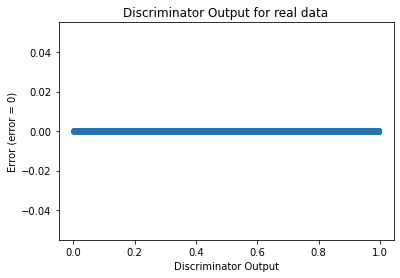

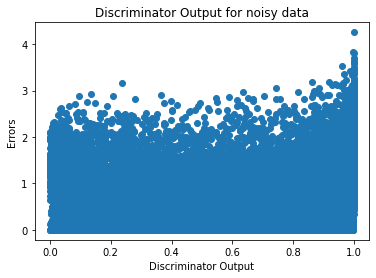

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4980]], device='cuda:0', requires_grad=True)
